## Bicycle store Analysis Using Python.

# Importing libraries pandas Libraries

In [96]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')



# Importing dataset

In [97]:
df = pd.read_csv("C:\\Users\\DELL\Downloads\\data survey.csv")

# Saving dataset to a DataFrame

In [98]:
data = pd.DataFrame(df)

# Dataset Preview

In [99]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Data Exploration

In [100]:
data.shape

(113036, 18)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [102]:
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [103]:
data.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [104]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [105]:
mean_order_Quantity = data['Order_Quantity'].mean()
mean_order_Quantity

11.901659648253654

# Product category with maximum profit

In [106]:
data[['Product_Category','Profit']].max()

Product_Category    Clothing
Profit                 15096
dtype: object

# Year with the Highest Revenue

In [107]:
data[['Year', 'Revenue']].max()

Year        2016
Revenue    58074
dtype: int64

# Gender Count

In [108]:
data['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

# Total Revenue made across all product Sold

In [109]:
Total_revenue = data['Revenue'].sum()
Total_revenue

85271008

# Subcategory that made the Highest Revenue

In [110]:
data[['Revenue','Sub_Category' ]].max()

Revenue         58074
Sub_Category    Vests
dtype: object

# Column with the highest Revenue

In [111]:
State_revenue = data.sort_values(by='Revenue', ascending=False).head(1)
State_revenue

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,24/07/2015,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


# State that made the highest order across all Products

In [112]:
data[['State', 'Order_Quantity']].value_counts().head(3)

State            Order_Quantity
California       1                 4286
England          1                 3056
New South Wales  1                 2441
dtype: int64

# Highest Quantity ordered by Product

In [113]:
data.sort_values(by = ['State', 'Order_Quantity'], ascending = False ).head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2499,25/06/2016,25,June,2016,27,Young Adults (25-34),M,France,Yveline,Accessories,Bottles and Cages,Mountain Bottle Cage,31,4,10,112,124,236
48571,17/12/2015,17,December,2015,27,Young Adults (25-34),F,France,Yveline,Clothing,Jerseys,"Short-Sleeve Classic Jersey, XL",31,42,54,-30,1302,1272


# Adding the Sales Column

In [114]:
data['Sales'] = data['Order_Quantity']*data['Unit_Price']
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Sales
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2760
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2400
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,480


In [115]:
data['Sales'].sum()

95176318

# Total sales in Australia.

In [135]:
data.loc[data['Country'] == 'Australia', 'Sales'].sum()

25427586

## DATA VISUALIZATION

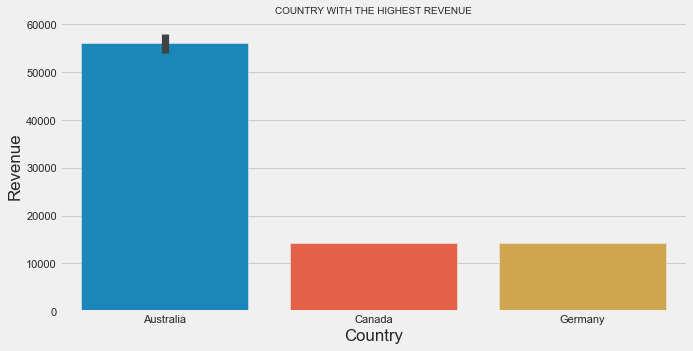

In [117]:
State_revenue = data.sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Country', 
            y= 'Revenue', 
            data = State_revenue).set_title("COUNTRY WITH THE HIGHEST REVENUE", 
            fontdict = { 'fontsize': 10});


In [ ]:
# Insights

Australia made the highest revenue across all the countries followed immediately by Germany

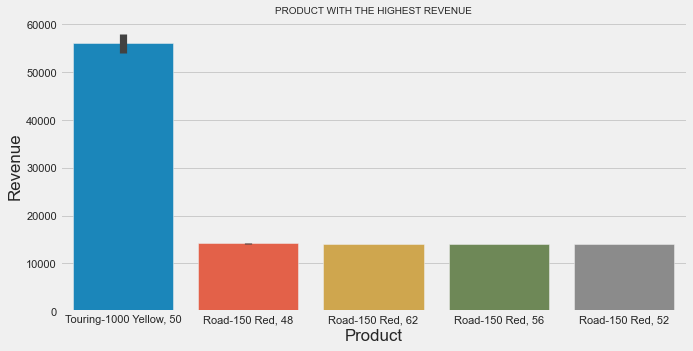

In [119]:
State_revenue = data.sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Product', 
            y= 'Revenue', 
            data = State_revenue).set_title("PRODUCT WITH THE HIGHEST REVENUE", 
            fontdict = { 'fontsize': 10});


In [ ]:
#insight

Touring-1000 Yellow,50 made the most revenue across all product line because of this i can actively advice
to invest on this product in Australia to make good revenue

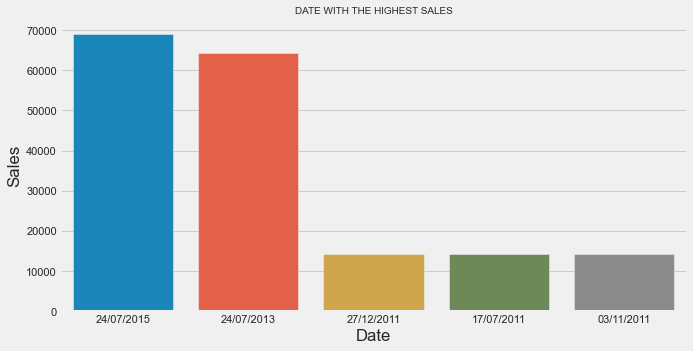

In [120]:
Date_of_sales = data.sort_values(by='Sales', ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Date', 
            y= 'Sales', 
            data = Date_of_sales).set_title("DATE WITH THE HIGHEST SALES", 
            fontdict = { 'fontsize': 10});


In [ ]:
The largest sales was made on the 24th of july 2015. i also noticed a relationship on july, the was high always high
sales on july as seen on my bar plot

Text(0.5, 1.0, 'MOST ORDERED PRODUCTS')

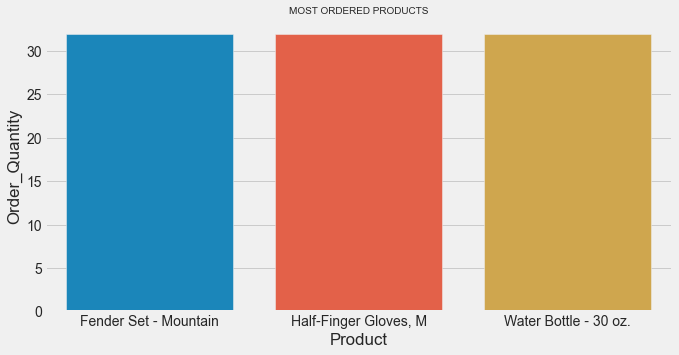

In [25]:
Product_with_highest_order = data.sort_values(by='Order_Quantity', ascending=False).head(3)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Product', 
            y= 'Order_Quantity', 
            data = Product_with_highest_order).set_title("MOST ORDERED PRODUCTS", 
            fontdict = { 'fontsize': 10})


In [ ]:
As seen from the barplot, Fender Set-Mountain, Half-Finger,M and Water Bottle-30 oz were the most 
ordered Product across all the Products.

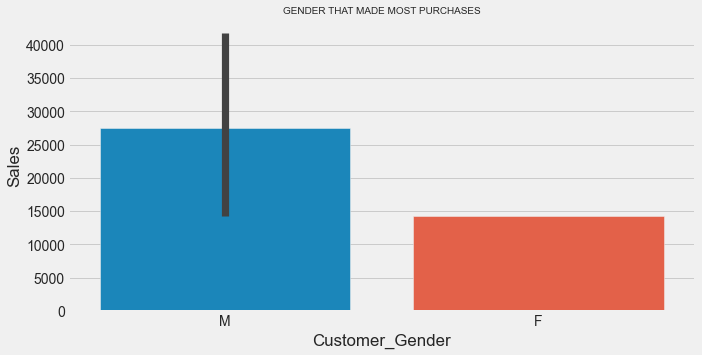

In [26]:
State_revenue = data.sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Customer_Gender', 
            y= 'Sales', 
            data = State_revenue).set_title("GENDER THAT MADE MOST PURCHASES", 
            fontdict = { 'fontsize': 10});

In [ ]:
Male gender made more Purchase as compared to the female gender, this simple means that mens product
was more purchased than females hence this means that along the line of investment male product should take 
the larger share of the investment.

<AxesSubplot:ylabel='Age_Group'>

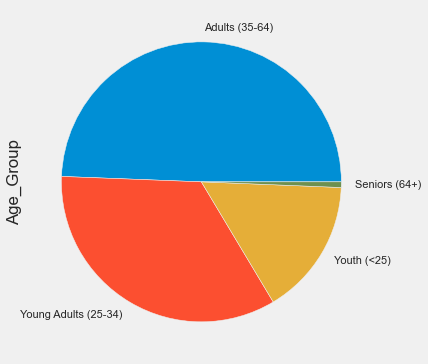

In [153]:
data['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
Adults(35-64) age group visited the Bicycle shop and made made the most purchase more that any other age Group.

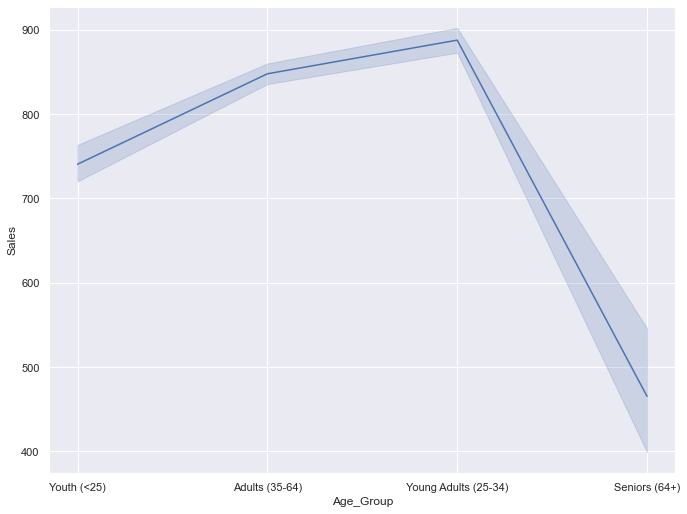

In [60]:
sns.lineplot(x = 'Age_Group', 
            y= 'Sales', 
            data = data)
plt.show()

In [ ]:
CLearly from our line plot we can notice that people from the age range of 25-34(Young Adults) 
made more purchase than any other age bracket and followed by Adults(35-64). 

Now this simple means that this same age bracket will make the highest profit and the highest 
revenue as well.

In [93]:
df = data.sort_values(['Profit'], ascending = False).head(10)

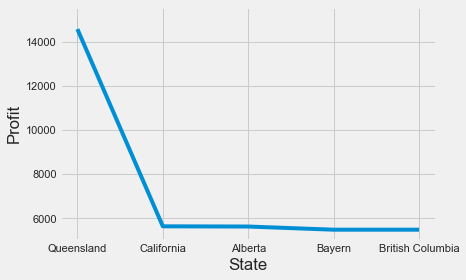

In [94]:
sns.lineplot(x = 'State', 
            y= 'Profit', 
            data = df)
plt.show()

In [ ]:
Queensland is the state that made the highest profit when compared across all states.